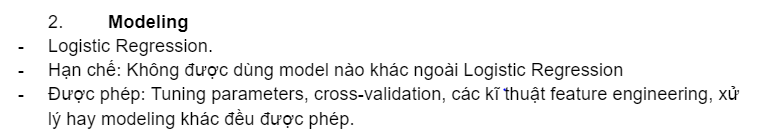

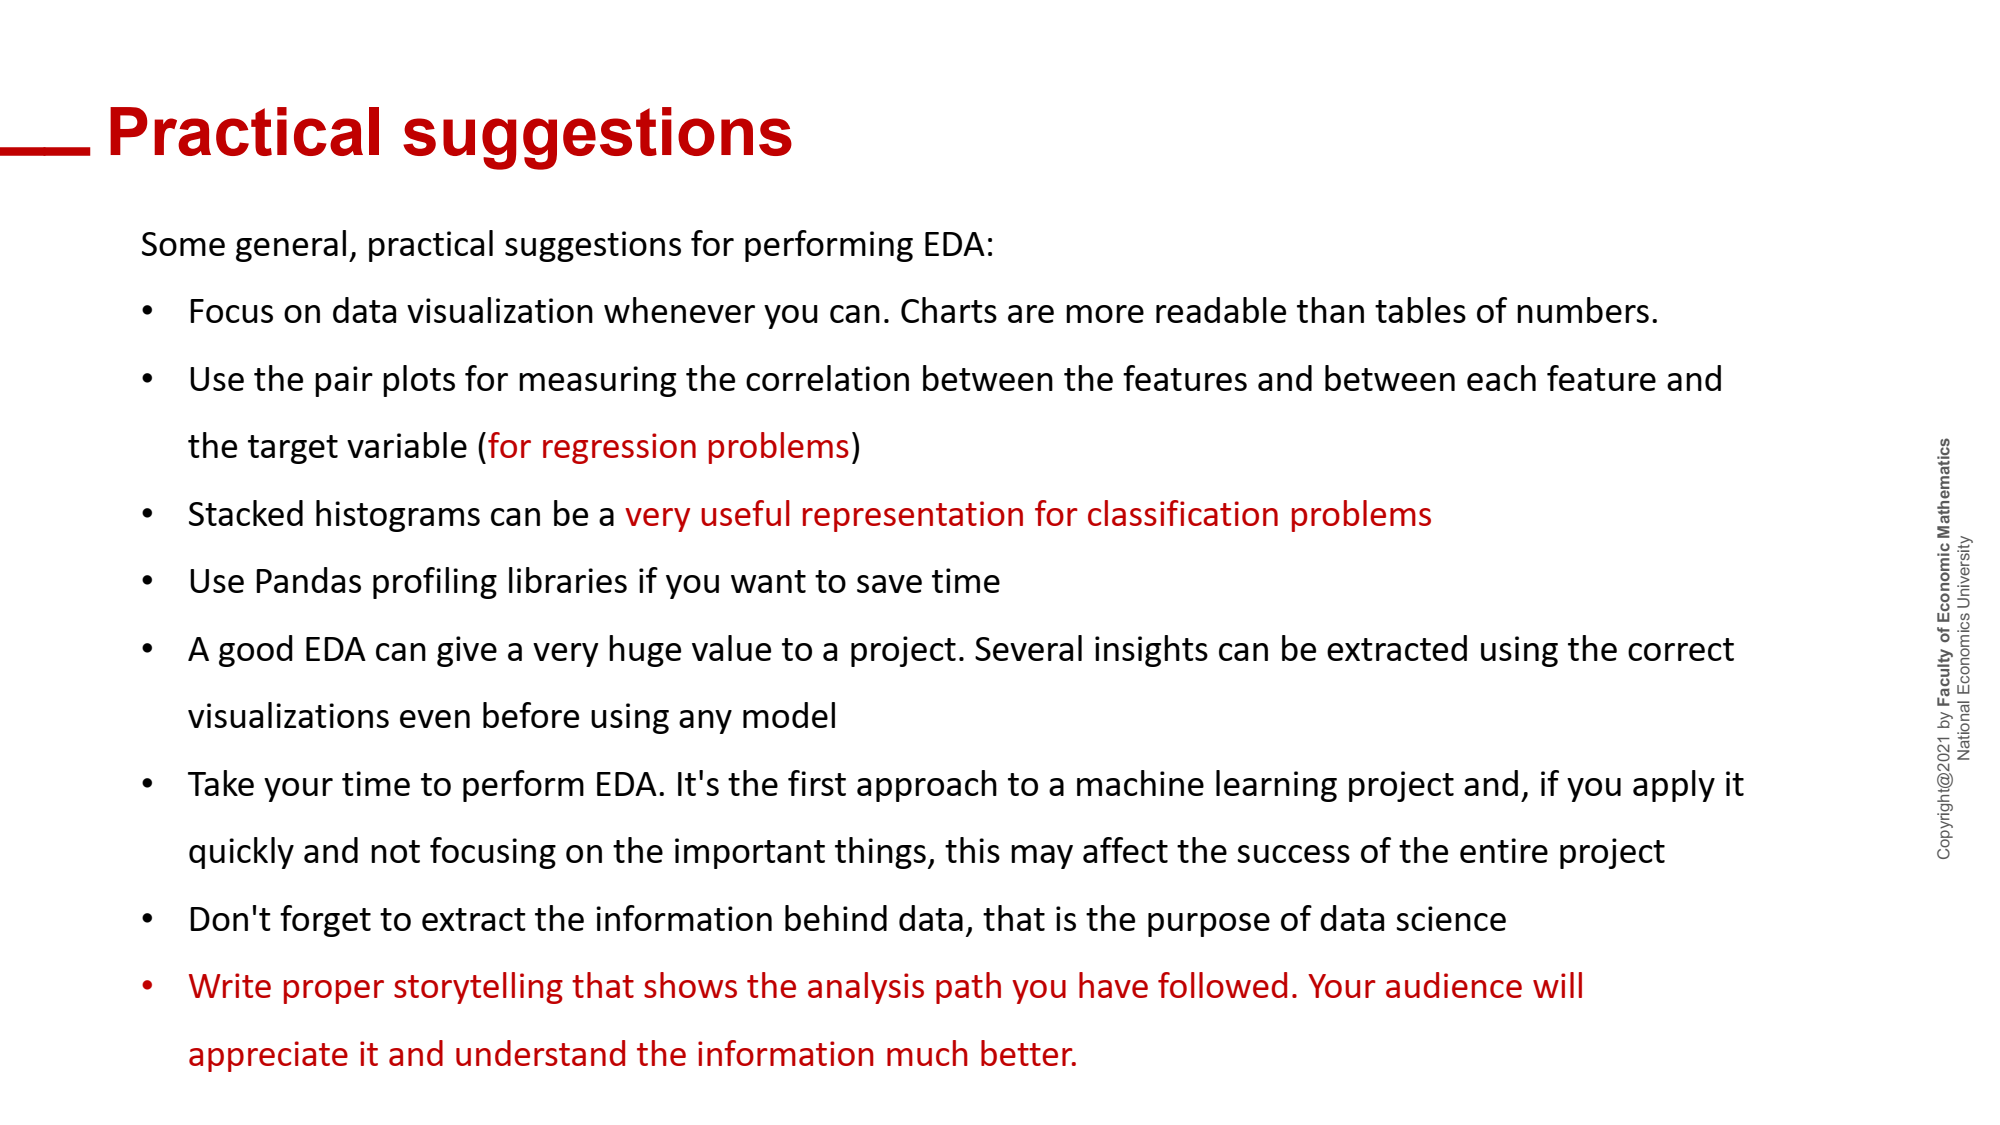

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
file = ['dseb63_application_test','dseb63_application_train','dseb63_bureau',\
        'dseb63_bureau_balance', 'dseb63_credit_card_balance','dseb63_installments_payments',\
        'dseb63_POS_CASH_balance','dseb63_previous_application']
link = 'D:\\Năm 3 - HK1\\Visualize\\Ex\\final_project\\dseb63_final_project_DP_dataset\\dseb63_final_project_DP_dataset\\'
df = pd.read_csv(link + file[1]+'.csv',index_col='Unnamed: 0')

In [3]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246009 entries, 0 to 246008
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    TARGET                        int64  
 1    NAME_CONTRACT_TYPE            object 
 2    CODE_GENDER                   object 
 3    FLAG_OWN_CAR                  object 
 4    FLAG_OWN_REALTY               object 
 5    CNT_CHILDREN                  int64  
 6    AMT_INCOME_TOTAL              float64
 7    AMT_CREDIT                    float64
 8    AMT_ANNUITY                   float64
 9    AMT_GOODS_PRICE               float64
 10   NAME_TYPE_SUITE               object 
 11   NAME_INCOME_TYPE              object 
 12   NAME_EDUCATION_TYPE           object 
 13   NAME_FAMILY_STATUS            object 
 14   NAME_HOUSING_TYPE             object 
 15   REGION_POPULATION_RELATIVE    float64
 16   DAYS_BIRTH                    int64  
 17   DAYS_EMPLOYED                 int64  
 18   DA

# Percentage Null values of each column

In [4]:
# f, ax = plt.subplots(figsize=(16,16))
# sns.barplot((df.isnull().sum()/df.shape[0]).sort_values(ascending=False).head(60),\
#            orient='h',width=0.4,palette='ch:s=.6,r=-.2',)
# ax.spines[['right','top','bottom','left']].set_visible(False)
# ax.tick_params(left=False)
# ax.xaxis.tick_top() 
# ax.grid(axis='x')
# ax.set_title('Top 60 feature with highest percentage null values',size=15,y=1.04,x=0.4)

#drop
col_drop =  (df.isnull().sum()/df.shape[0]).sort_values(ascending=False).index[:51]
#consider 
# correl (df2.isnull().sum()/df2.shape[0]).sort_values(ascending=False).index[51:57]
col_keep = (df.isnull().sum()/df.shape[0]).sort_values(ascending=False).index[51:]

In [5]:
# descript = pd.read_csv('D:\\Năm 3 - HK1\\Visualize\\Ex\\final_project\\dseb63_columns_description.csv',\
#                        encoding='latin',index_col='Unnamed: 0')
# info = descript[descript.Row.isin(col_drop)].iloc[:,1:3]
# des = pd.DataFrame((df.isnull().sum()/df.shape[0]).sort_values(ascending=False).reset_index()[:51])
# des.merge(info,left_on = 'index',right_on='Row').drop(columns='index')[['Row','Description',0]]

In [6]:
# numerical_col = df.select_dtypes(include='number').columns
# f, ax =plt.subplots(27,4,figsize=(25,5*27))
# for ax, column in zip(ax.flatten(),numerical_col):    
#      sns.boxplot(df[column],ax=ax,orient='v',)  

In [59]:
def fence(df, feature):
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    upper = q3 + 1.5*(q3-q1)
    lower = q1 - 1.5*(q3-q1)
    return lower, upper

def num_visual(df,feature):
    """Visualize numeric, continuous feature"""
    f, ax = plt.subplots(1,4,figsize =(20,4),gridspec_kw={'width_ratios':[1,2,2,2]})
    # calculate upper and lower fence 
    l,u = fence(df, feature)
    # closer look in to quartile, skewness, kurtosis, median, outliner
    sns.boxplot(df[feature],ax=ax[0])
    # distribution of feature
    if u!= l:
        ax[1].hist(df[(df[feature]<u) & (df[feature]>l)][feature])
        # cross_tabulation with Target variable
        ax[2].hist(df[(df['TARGET']==1) & (df[feature]<u) & (df[feature]>l)][feature],color ='red',alpha = 0.3,)
        ax[3].hist(df[(df['TARGET']==0) & (df[feature]<u) & (df[feature]>l)][feature],color ='green',alpha = 0.4)
    else:
        ax[1].hist(df[feature])
        # cross_tabulation with Target variable
        ax[2].hist(df[(df['TARGET']==1)][feature],color ='red',alpha = 0.3,)
        ax[3].hist(df[(df['TARGET']==0)][feature],color ='green',alpha = 0.4)
    f.tight_layout(w_pad=1.5,h_pad=1.5)

    # beautify
    ax[0].set_ylabel(feature+'\n'+'_'*35+'\n\n',fontweight = 'bold',fontsize=12)
    # for i in range(1,3):
        # ax[i].set_xlim(l,u)
    for i in range(4):
        ax[i].spines[['top','bottom','left','right']].set_color('grey')
        ax[i].tick_params(left=False, bottom = False)
        if i!= 0:
            ax[i].grid(axis = 'y')

def cat_visual(df,feature):
    f, ax = plt.subplots(1,3,figsize = (5*3,4),gridspec_kw={'width_ratios':[1.5,2,2]})
    #1
    sns.barplot(df[feature].value_counts(),orient='h',ax=ax[0],palette='Set2',width = 0.5)
    ax[0].spines[['top','bottom','left','right']].set_visible(False)
    ax[0].tick_params(left=False)
    ax[0].xaxis.tick_top() 
    ax[0].set_xlabel('')
    #2
    ax[1].pie(x=df[df['TARGET']==1][feature].value_counts(),\
    labels=df[df['TARGET']==1][feature].value_counts().index,\
    startangle=90,autopct='%.2f%%') 
    #3
    ax[2].pie(x=df[df['TARGET']==0][feature].value_counts(),\
    labels=df[df['TARGET']==0][feature].value_counts().index,\
    startangle=90,autopct='%.2f%%') 
    
    #beautify
    ax[0].set_ylabel(feature+'\n'+'_'*30+'\n\n',fontweight = 'bold',fontsize=12)

    plt.tight_layout(w_pad=2,h_pad=2)

[Text(0, 0, ''), Text(0, 0, '')]


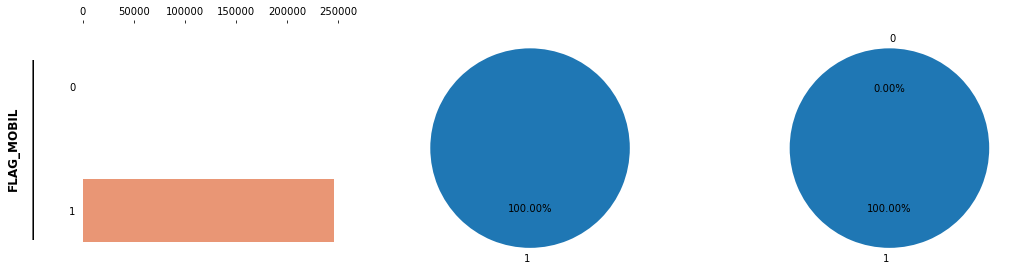

In [60]:
cat_visual(df,'FLAG_MOBIL')

In [8]:
df.describe()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_CURR
count,246009.000000,246009.000000,2.460090e+05,2.460090e+05,245999.000000,2.457850e+05,246009.000000,246009.000000,246009.000000,246009.000000,...,246009.000000,246009.000000,246009.000000,212798.000000,212798.000000,212798.000000,212798.000000,212798.000000,212798.000000,246009.000000
mean,0.080794,0.416229,1.684589e+05,5.996410e+05,27120.238129,5.389827e+05,0.020855,-16038.946343,63852.612441,-4985.222248,...,0.000581,0.000496,0.000309,0.006480,0.006729,0.034211,0.266647,0.266920,1.901127,153580.509542
std,0.272519,0.720664,1.045297e+05,4.030980e+05,14510.634712,3.700520e+05,0.013818,4361.265483,141306.376949,3521.391396,...,0.024103,0.022264,0.017574,0.084239,0.106693,0.204336,0.911957,0.834132,1.870269,88764.127645
min,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-23416.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.125000e+05,2.700000e+05,16506.000000,2.385000e+05,0.010006,-19682.000000,-2758.000000,-7482.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,76772.000000
50%,0.000000,0.000000,1.462500e+05,5.147775e+05,24903.000000,4.500000e+05,0.018850,-15755.000000,-1212.000000,-4504.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,153390.000000
75%,0.000000,1.000000,2.025000e+05,8.086500e+05,34654.500000,6.795000e+05,0.028663,-12418.000000,-288.000000,-2006.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,230433.000000
max,1.000000,19.000000,1.350000e+07,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,0.000000,...,1.000000,1.000000,1.000000,3.000000,9.000000,8.000000,27.000000,261.000000,25.000000,307510.000000


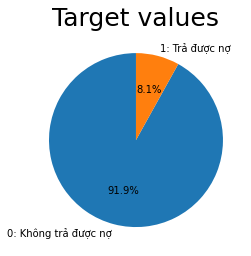

In [9]:
fig, ax = plt.subplots()
ax.pie(df["TARGET"].value_counts(normalize= True), autopct='%1.1f%%', startangle=90, labels = ['0: Không trả được nợ','1: Trả được nợ'])
plt.title('Target values',fontsize=25)
plt.show()

Text(0.5, 1.0, 'Percentage of clients provide these document')

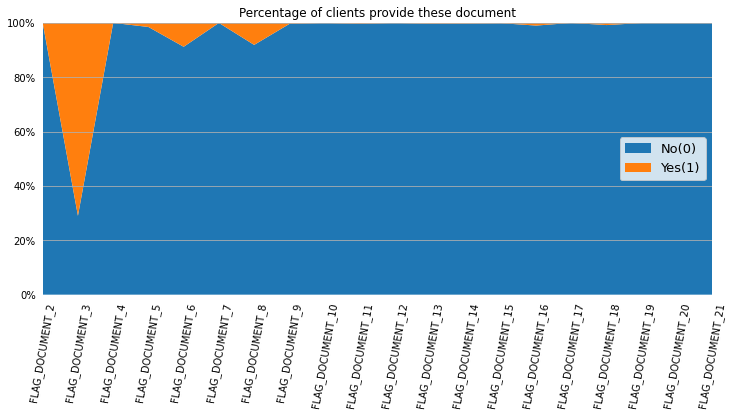

In [10]:
starting_idx = df.columns.get_loc("FLAG_DOCUMENT_2")
ending_idx = df.columns.get_loc("FLAG_DOCUMENT_21")+1
a = pd.DataFrame()
for i in range(starting_idx,ending_idx):
    a[df.columns[i]] = df.iloc[:,i].value_counts(normalize=True)
f, ax = plt.subplots(figsize=(12,5))
ax.stackplot(a.columns, a.iloc[0],a.iloc[1])
ax.set_xticklabels(a.columns,rotation=80)
ax.spines[['top','bottom','right','left']].set_visible(False)
ax.set_xlim(0,19)
ax.set_ylim(0,1)
ax.set_yticklabels(['0%','20%','40%','60%','80%','100%'])
ax.tick_params(left=False,bottom=False)
ax.grid(axis='y')
ax.legend(['No(0)','Yes(1)'],fontsize=13,loc = 'center right')
ax.set_title('Percentage of clients provide these document')

# Social circle

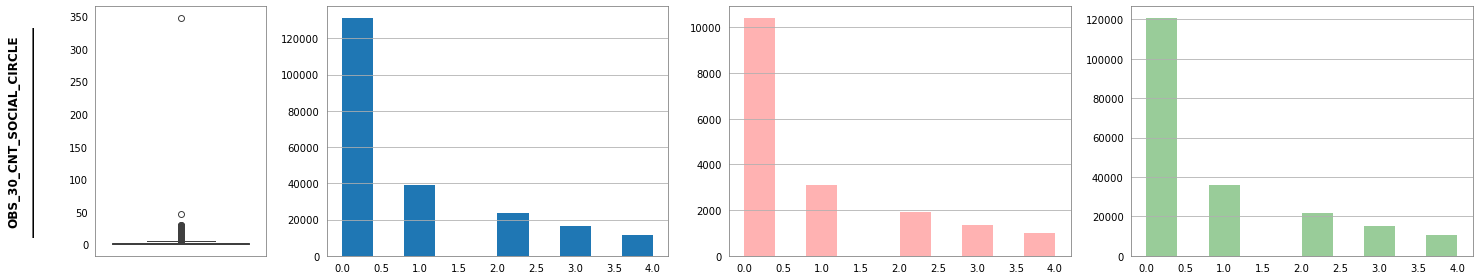

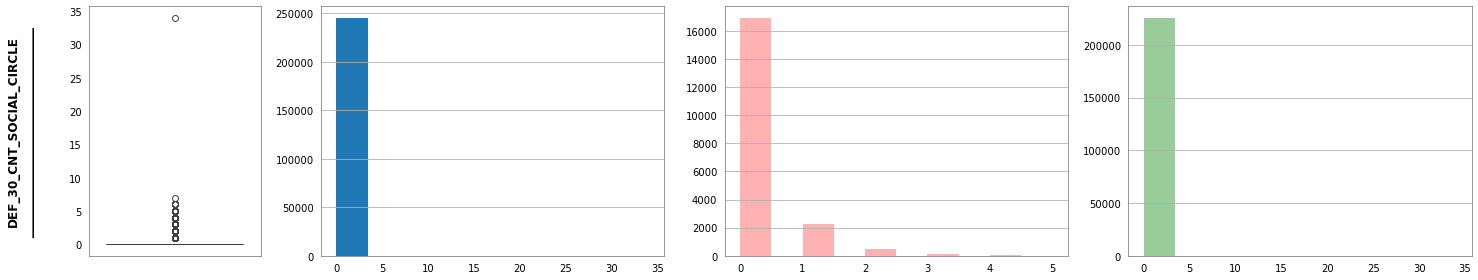

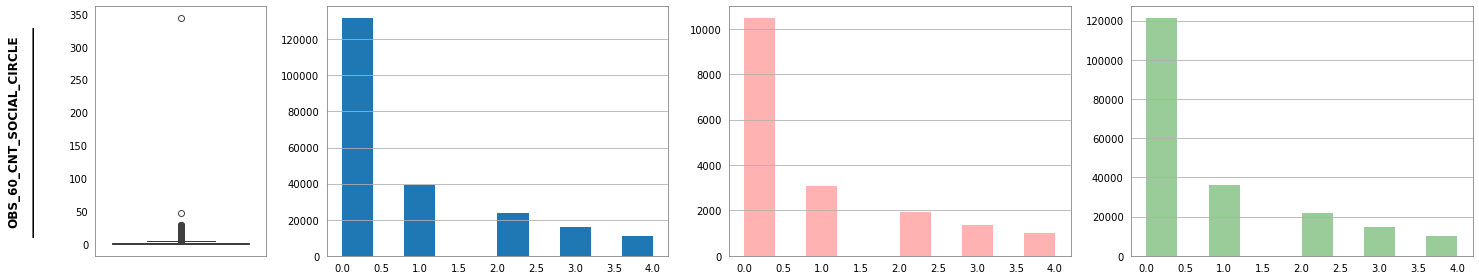

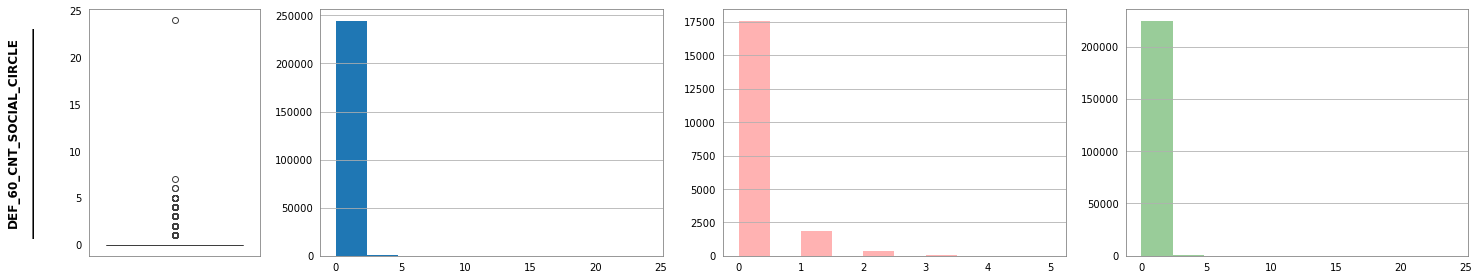

In [11]:
# consider whether social contact of clients have past due default more than N days
social = ['OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE']
for col in social:
    num_visual(df,col)

<AxesSubplot:>

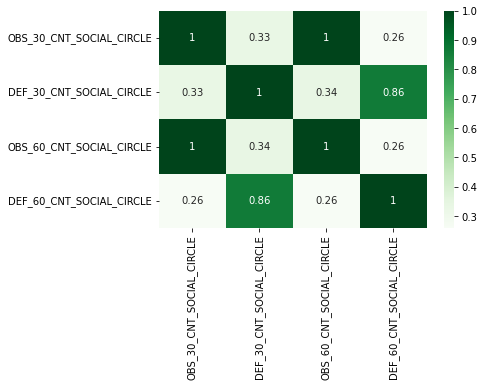

In [13]:
sns.heatmap(df[social].corr(),annot=True,cmap = 'Greens')

In [14]:
# df.describe(include=["object", "category"])

In [15]:
# for col in df.select_dtypes(include=['object','category']).columns:
#     print(col, "\n" ,df[col].unique())    

# Enquiries frequence

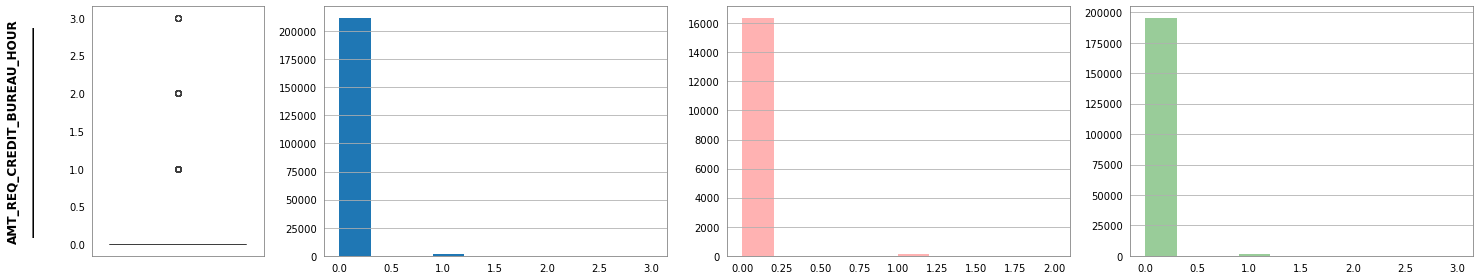

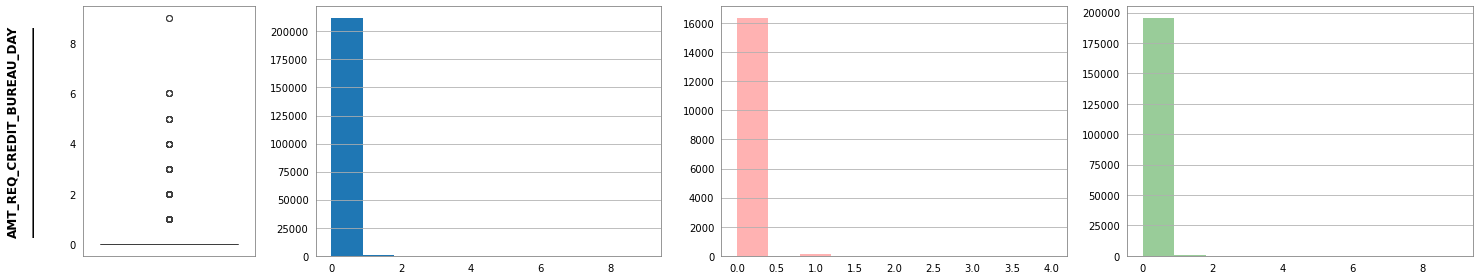

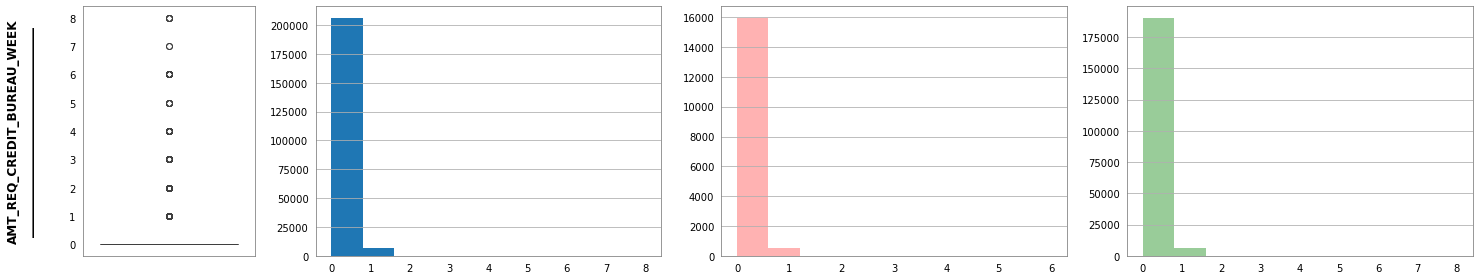

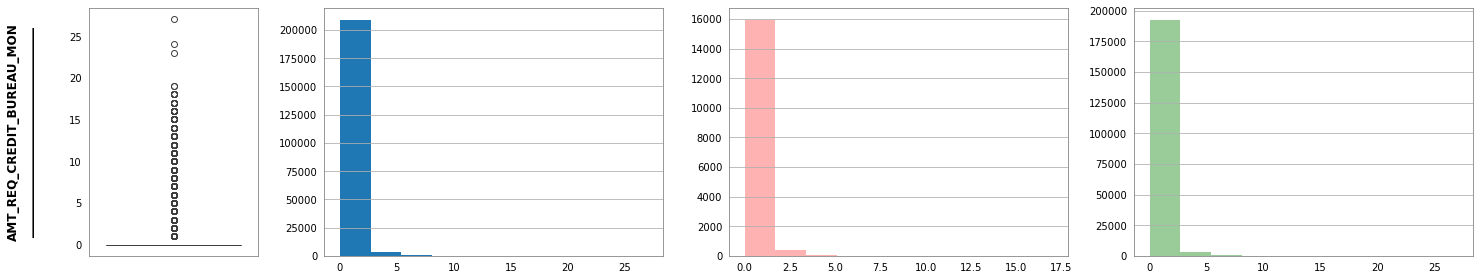

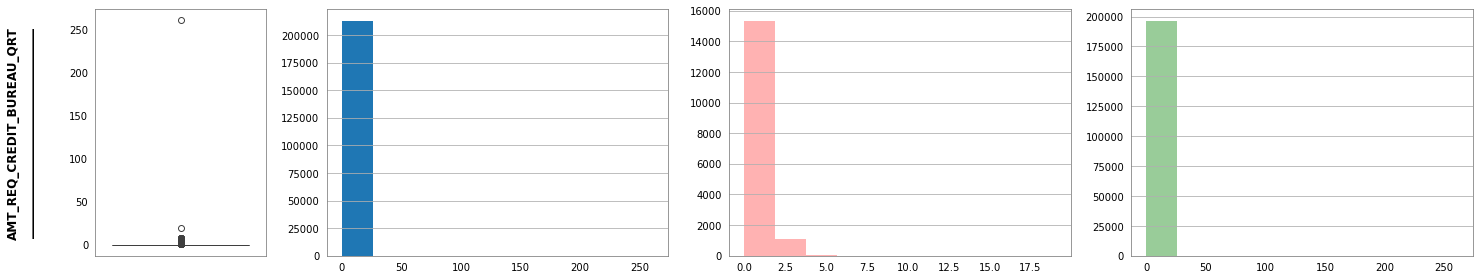

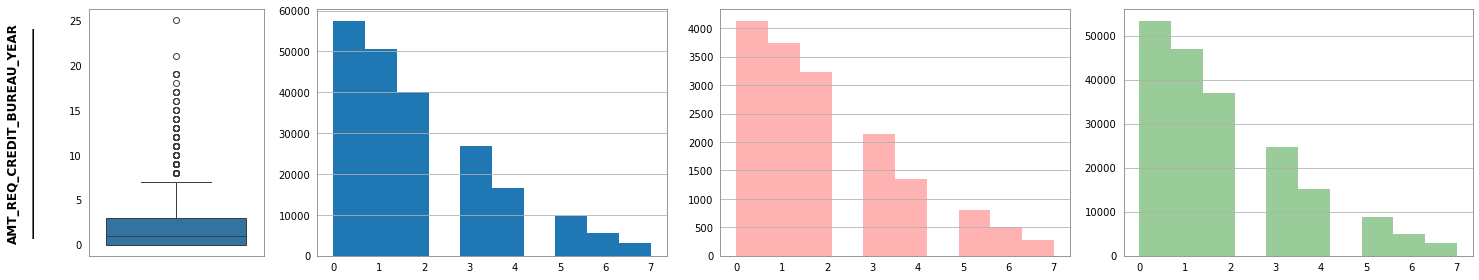

In [16]:
req = ['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']
for col in req:
    num_visual(df,col)
#drop from hour to qrt

# External sources

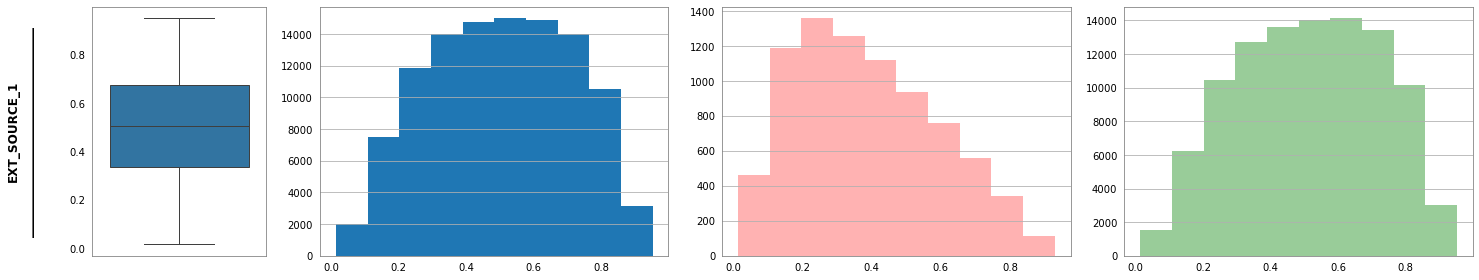

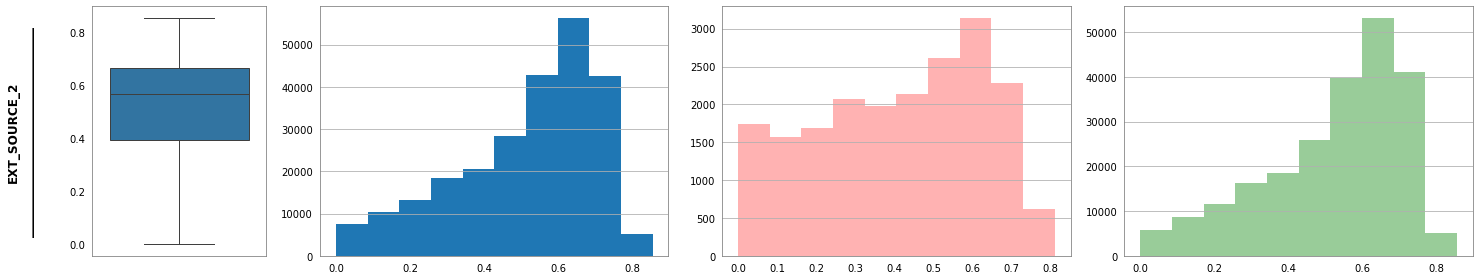

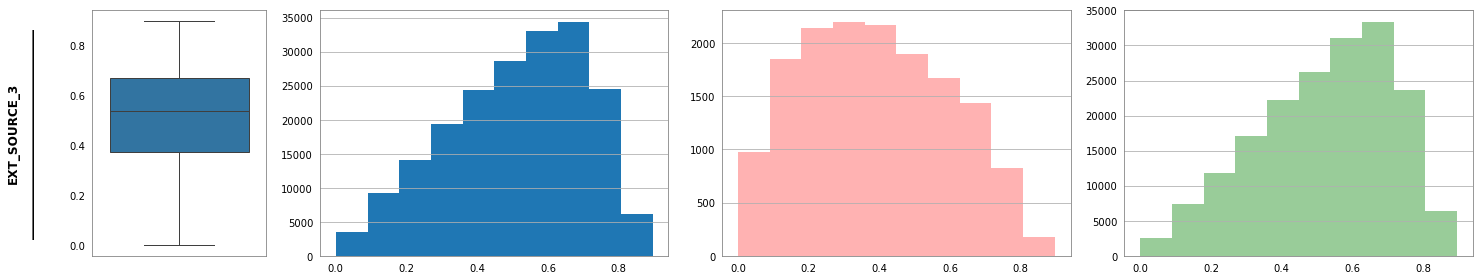

In [17]:
ext =['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']
for col in ext:
    num_visual(df,col)

ex1, ext3 high missing value, consider more

# DAY TIMES

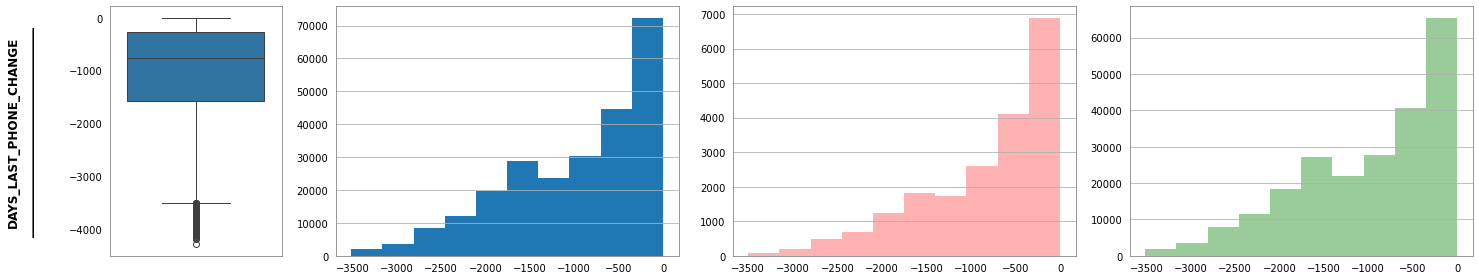

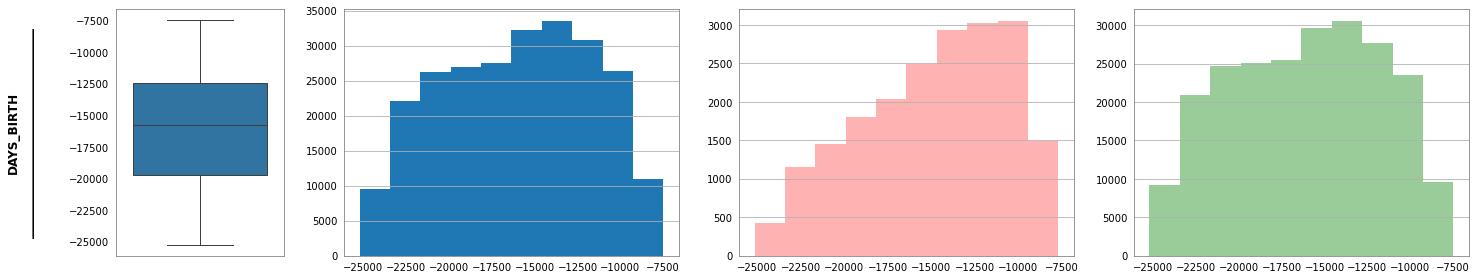

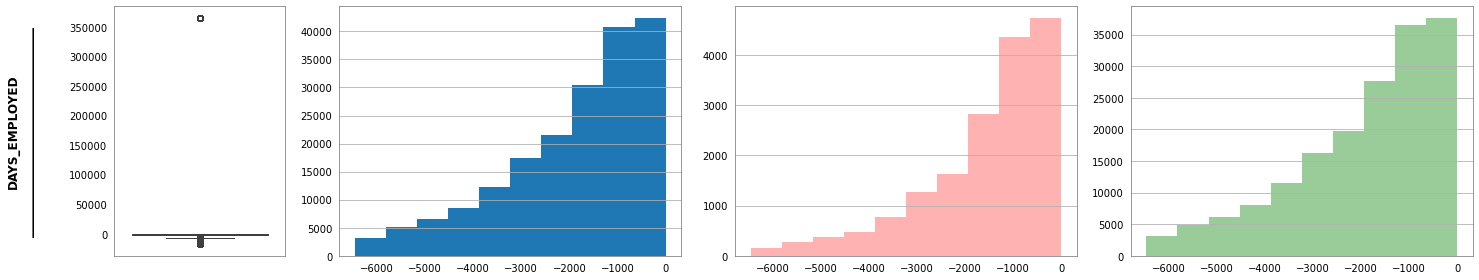

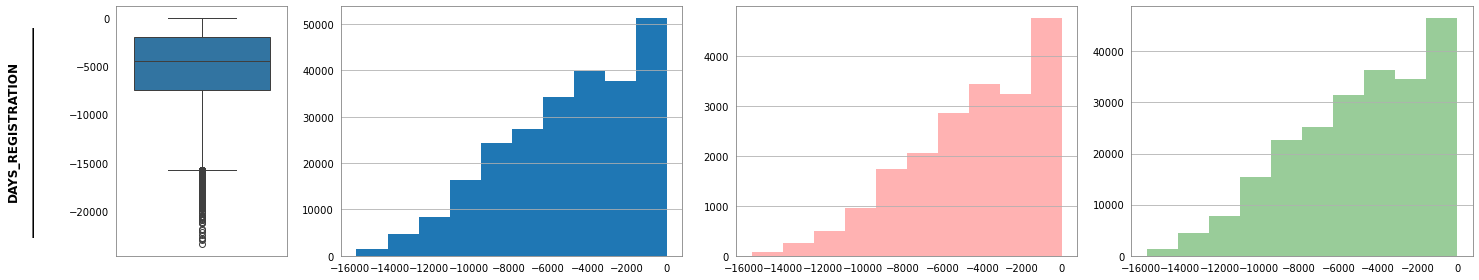

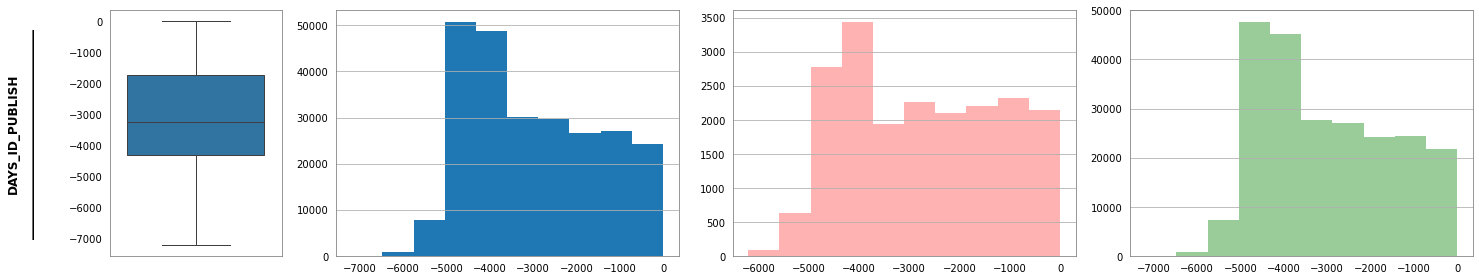

In [18]:
day = ['DAYS_LAST_PHONE_CHANGE','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']
for col in day:
    num_visual(df,col)
# the last plot has no outliner
# negative days, outliner
# (df[df['DAYS_EMPLOYED']<(365*70)]['DAYS_EMPLOYED']/365).hist()
# visual of distribution of these feature at both target given
# the same shape may be dont have much infomation except 'DAY_BIRTH'

# CONTACT


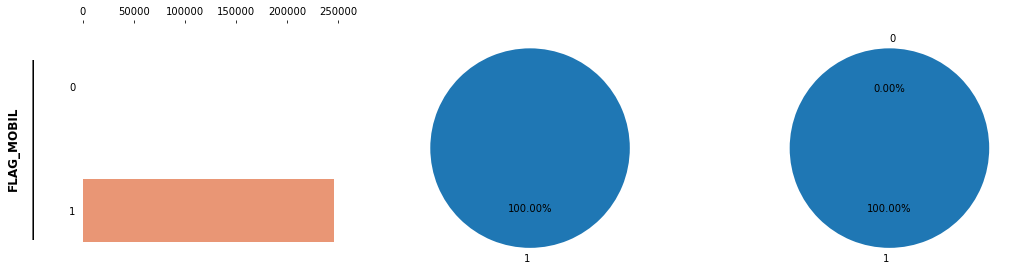

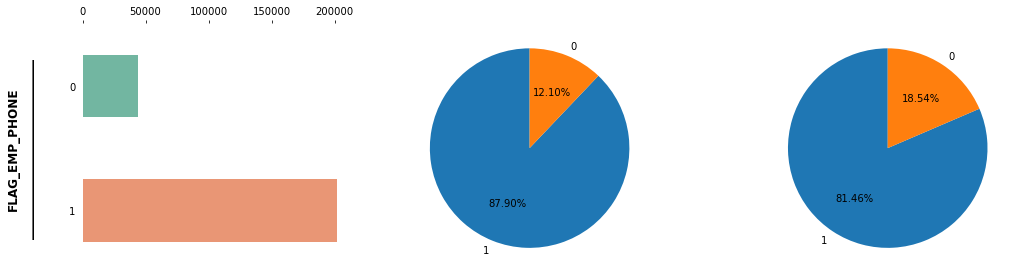

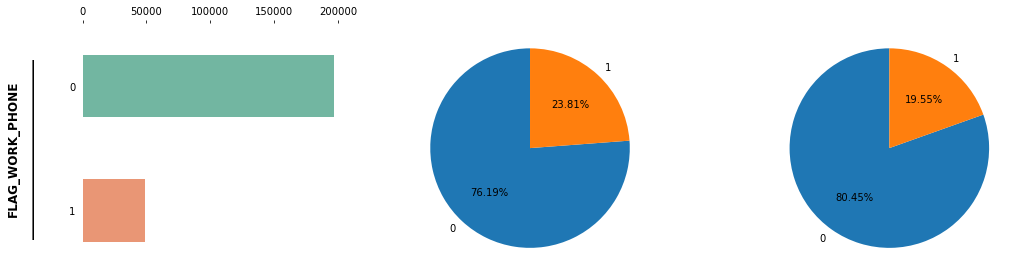

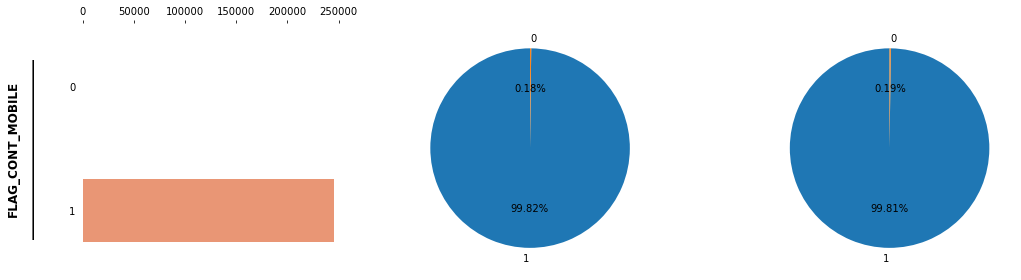

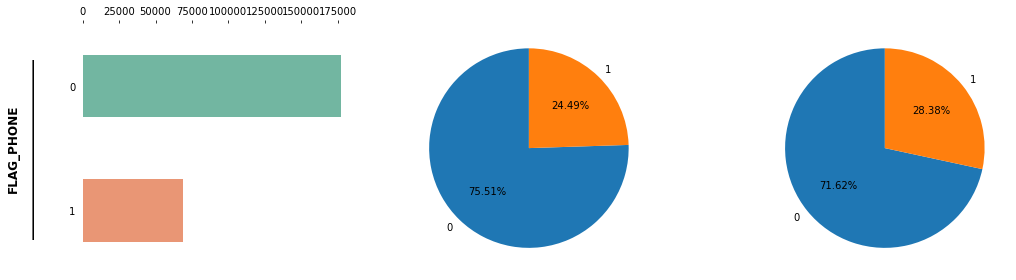

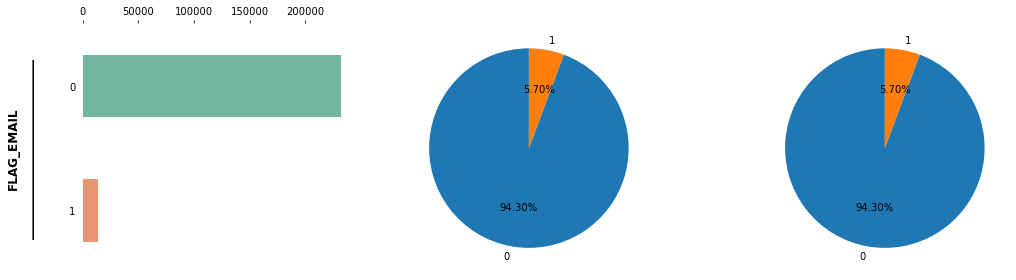

In [19]:
contact= ['FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL']
for col in contact:
    cat_visual(df,col)

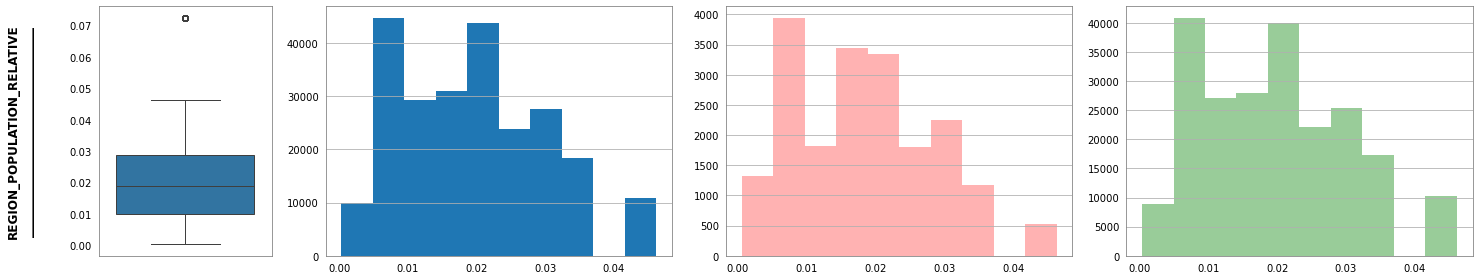

In [20]:
pop = 'REGION_POPULATION_RELATIVE'
num_visual(df,pop)

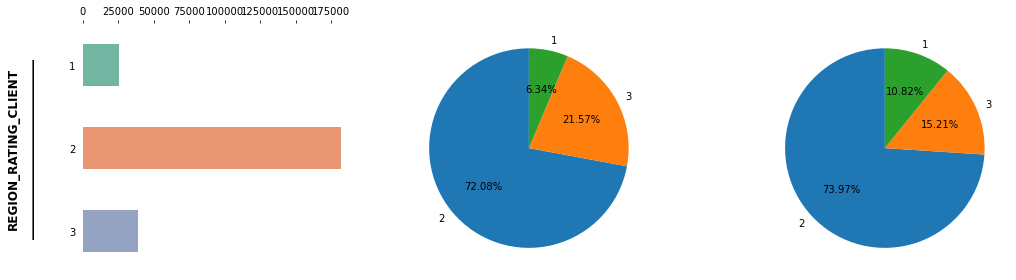

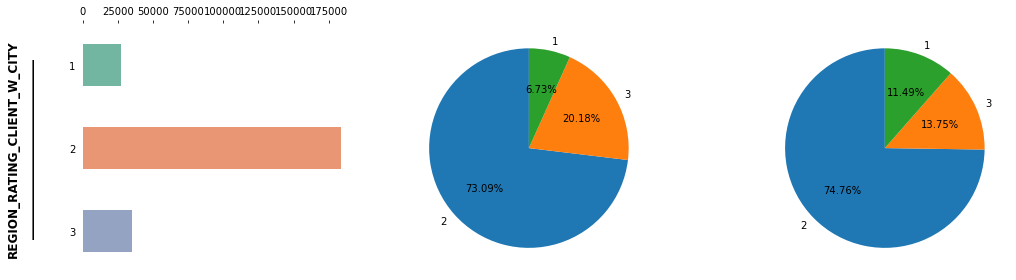

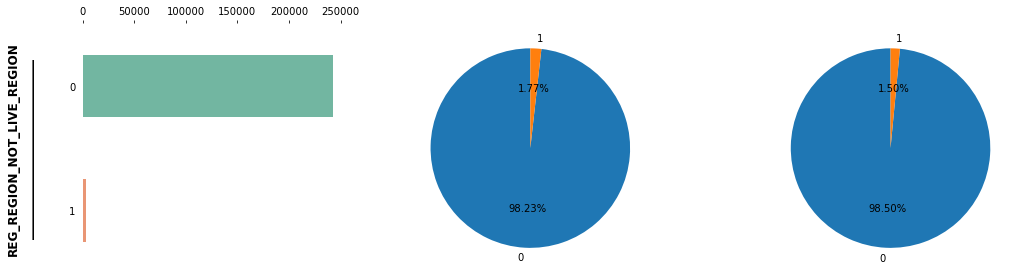

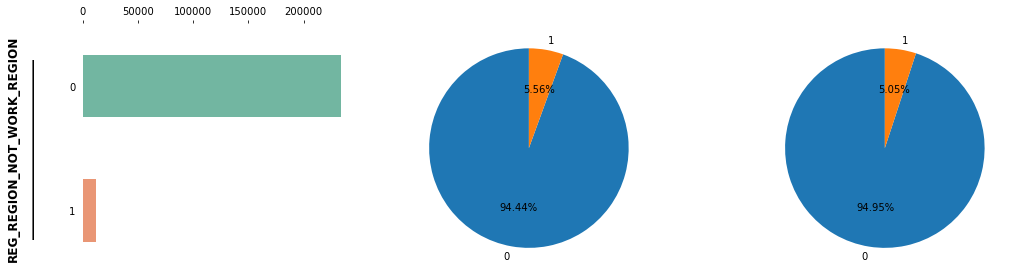

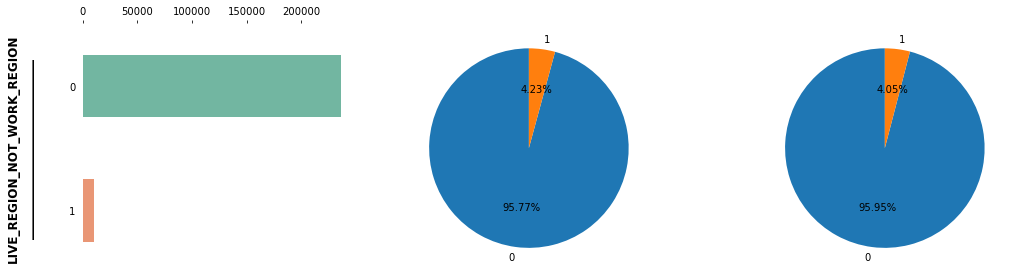

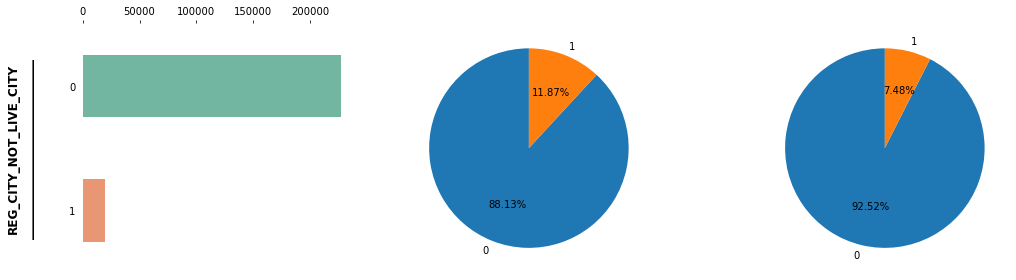

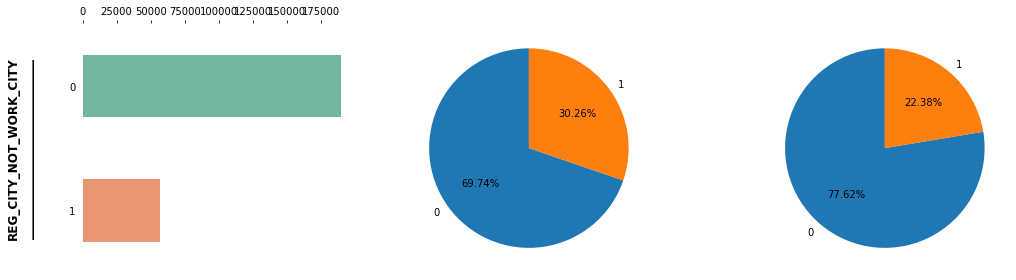

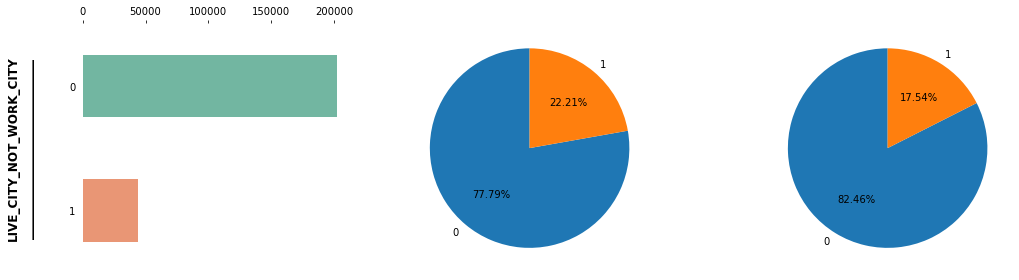

In [21]:
region = ['REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','REG_REGION_NOT_LIVE_REGION',\
       'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION',\
       'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY']
for col in region:
       cat_visual(df,col)

<AxesSubplot:>

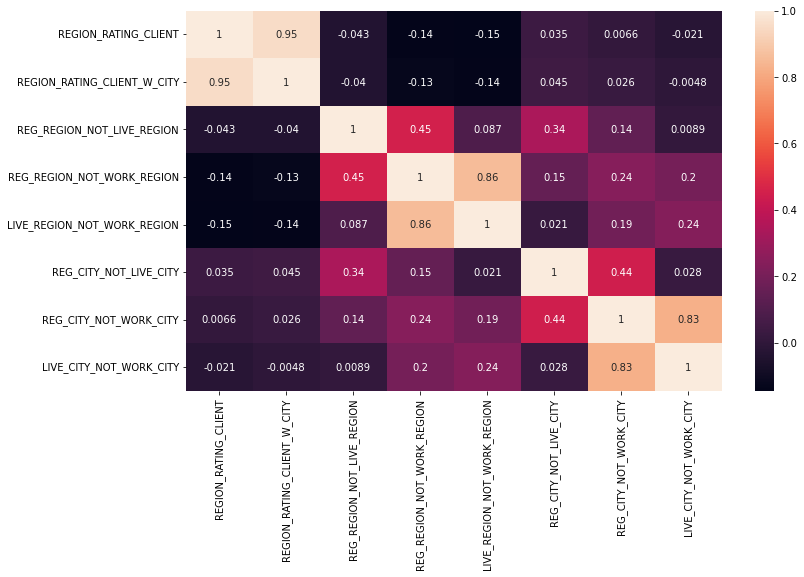

In [23]:
plt.figure(figsize=(12,7))
sns.heatmap(df[region].corr(),annot=True)
# drop region rateing client, keep the 2nd becust is was taken into consideration
# drop 'REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION',
# drop'LIVE_REGION_NOT_WORK_REGION',REG_CITY_NOT_LIVE_CITY'
#  consider drop 'REG_CITY_NOT_WORK_CITY' or 'LIVE_CITY_NOT_WORK_CITY'

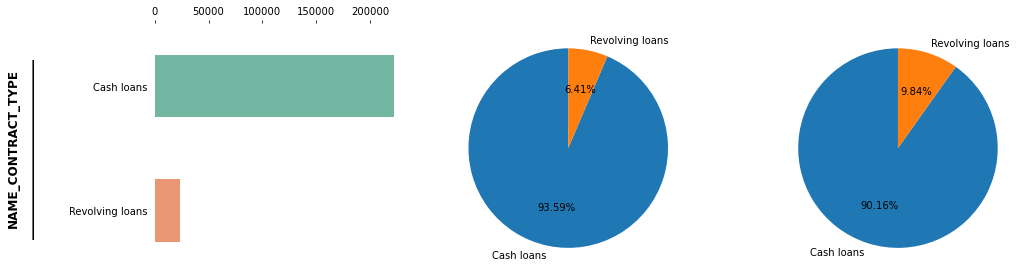

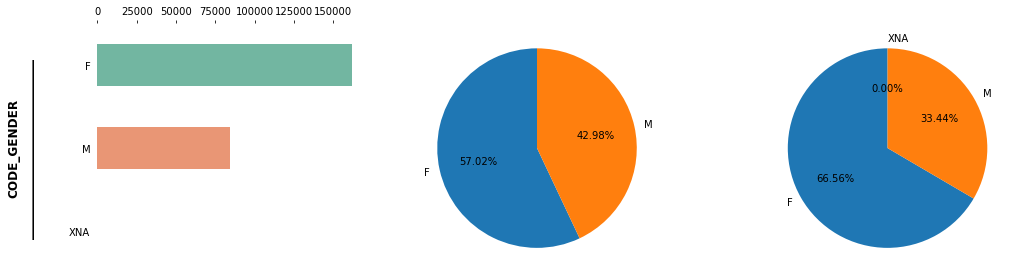

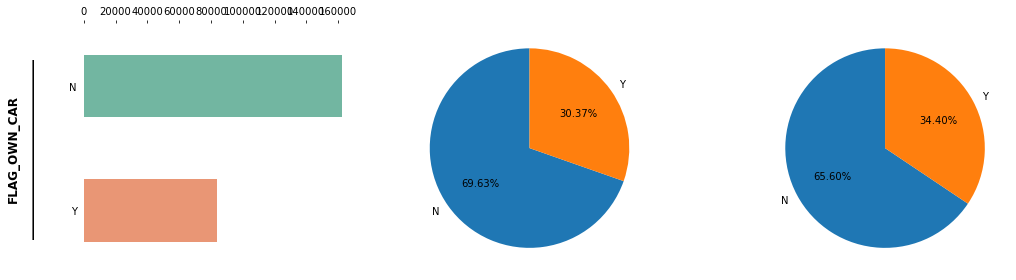

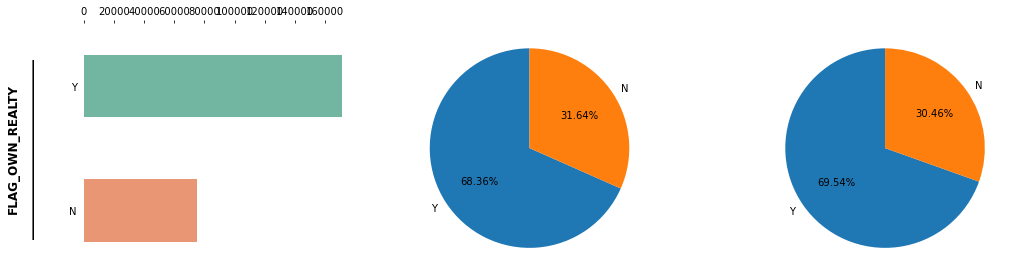

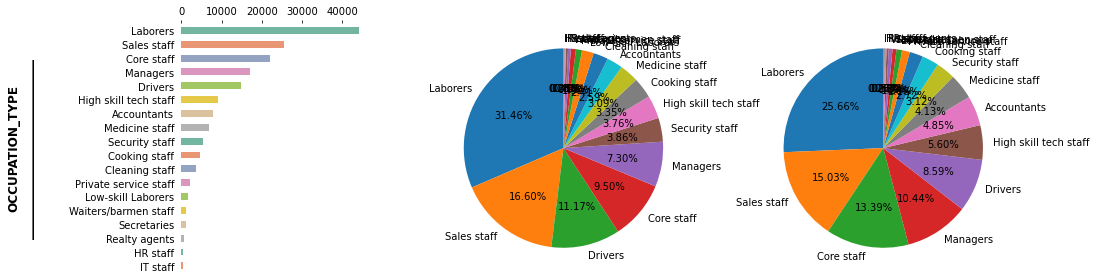

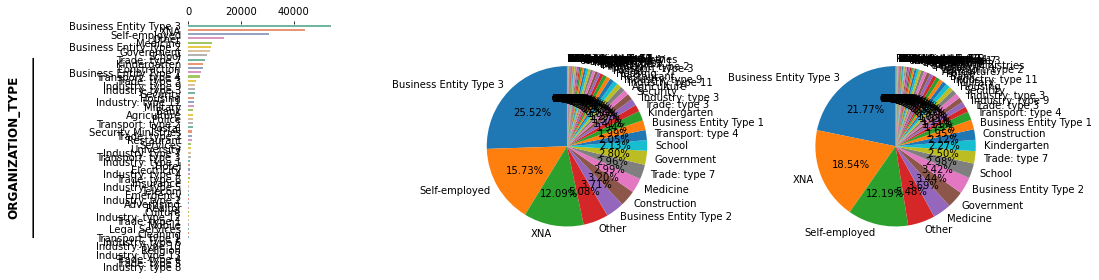

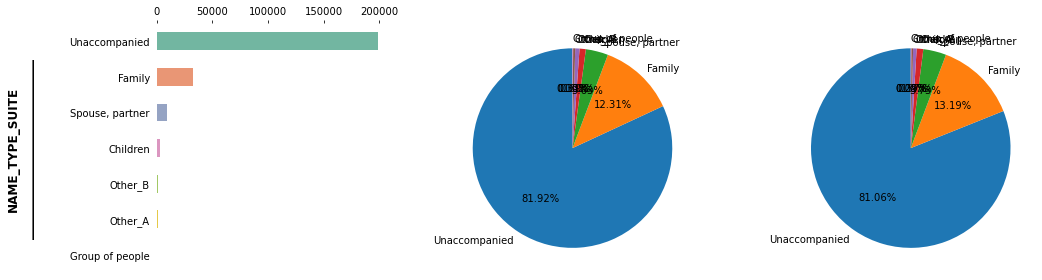

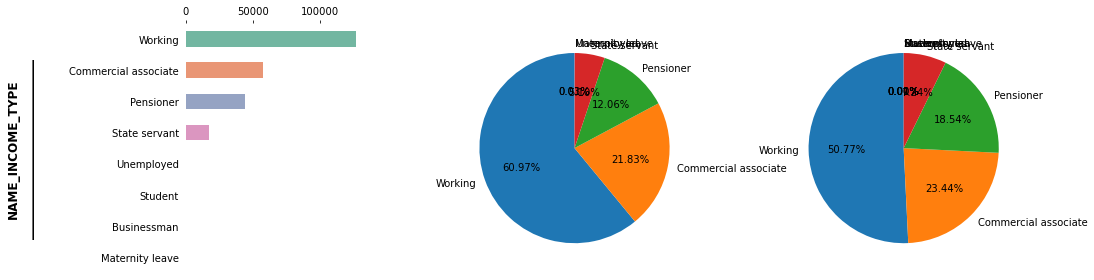

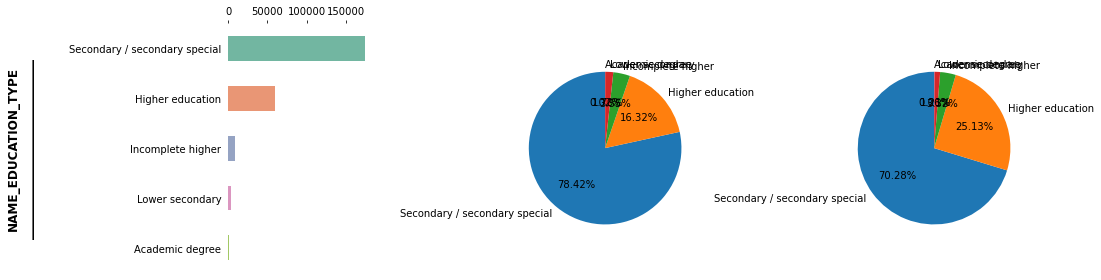

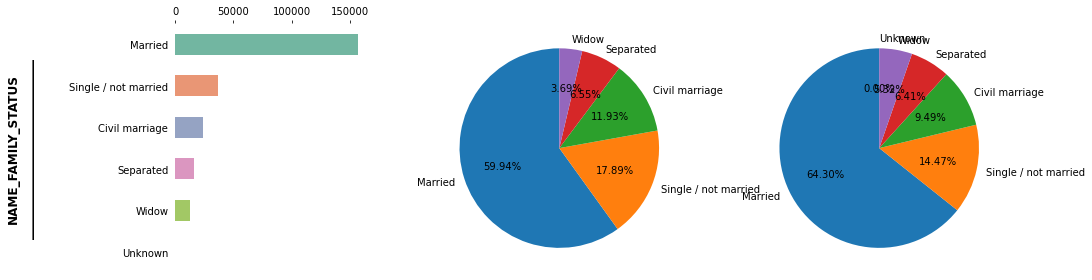

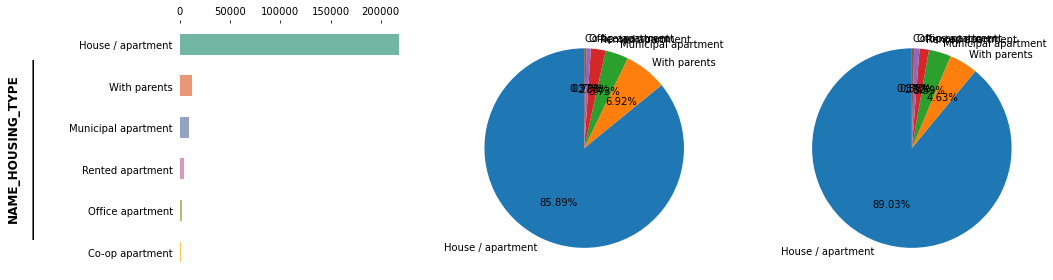

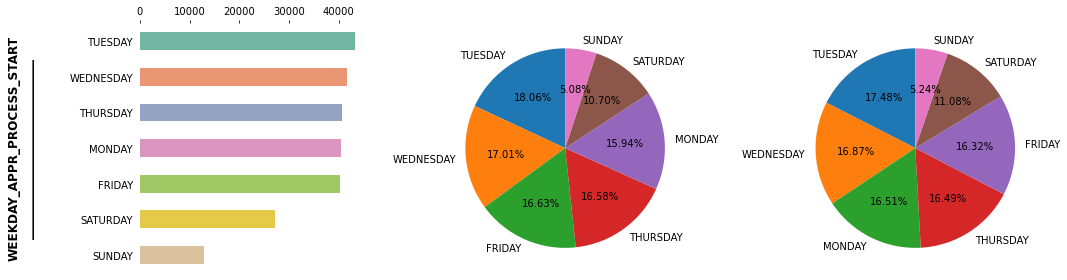

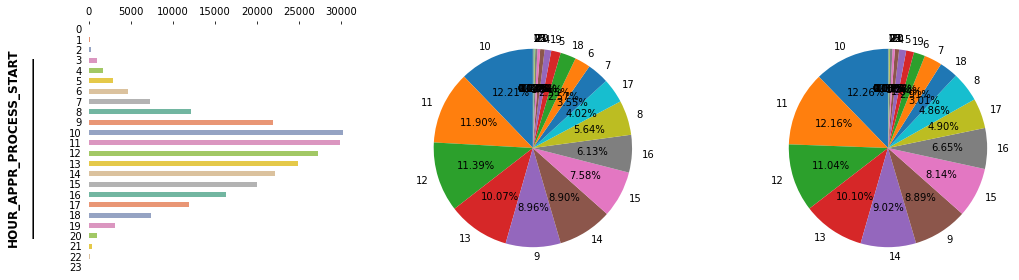

In [24]:
cols = ['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY',\
'OCCUPATION_TYPE','ORGANIZATION_TYPE','NAME_TYPE_SUITE','NAME_INCOME_TYPE',\
'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE',\
'WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START']
for i in cols:
    cat_visual(df,i)

In [25]:
# 'NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','OCCUPATION_TYPE', ổn rồi
# code gender co it null XNA
# include less appearance variable 'NAME_TYPE_SUITE','NAME_INCOME_TYPE',
# 'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE',

# insignt 'WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START' khong co su thay doi nhieu lam

# FINANCIAL CONDITION

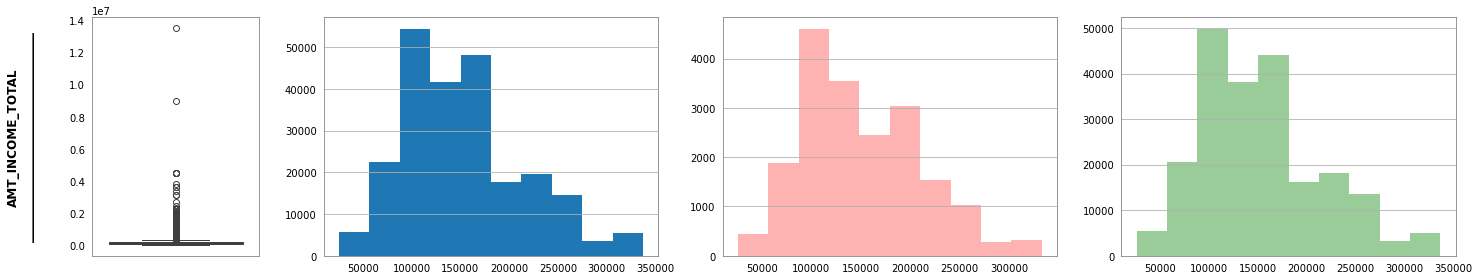

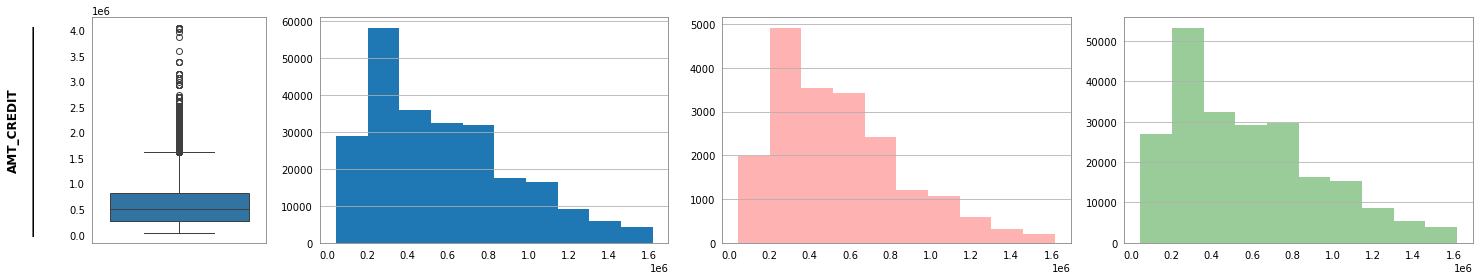

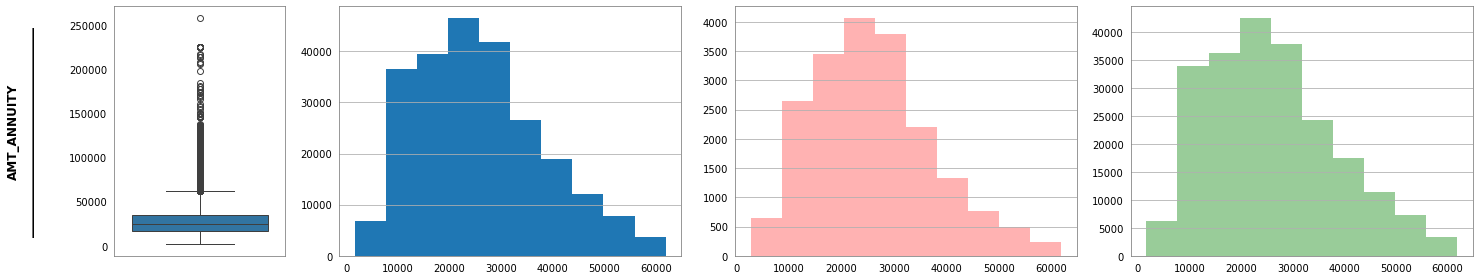

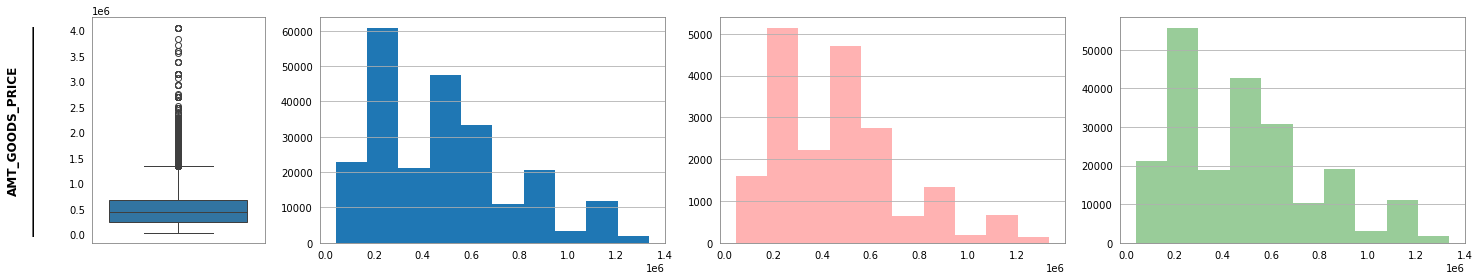

In [26]:
fin = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']
for col in fin:
    num_visual(df,col)

# FAMILY

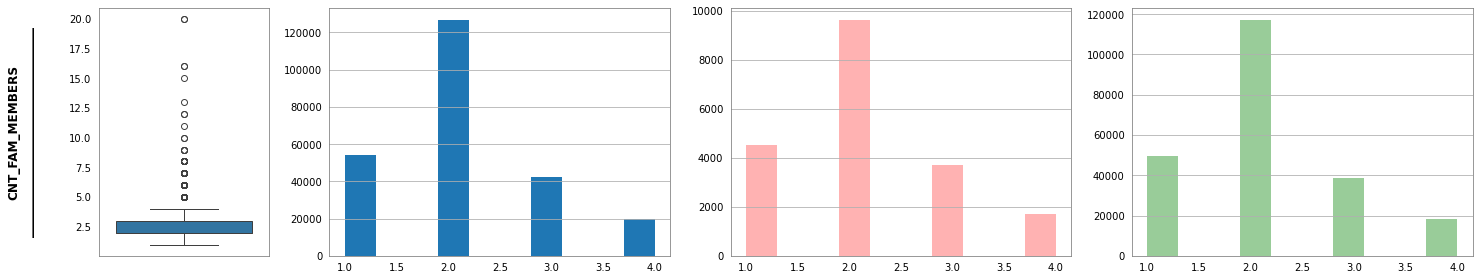

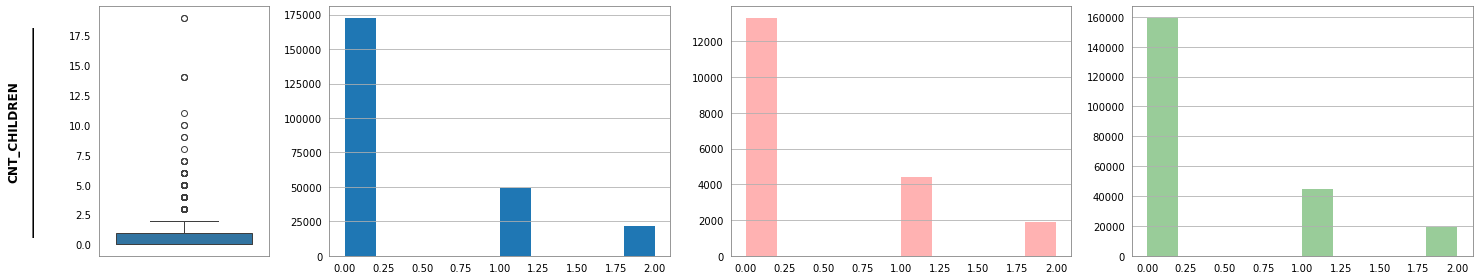

In [27]:
fam = ['CNT_FAM_MEMBERS','CNT_CHILDREN'] # astype('int)
for col in fam:
    num_visual(df,col)

In [ ]:
corr = pd.DataFrame(df.corr())

In [274]:
def vi(df, feature,n):
    pos = df.loc[feature].sort_values().tail(n+1)[:-1]
    neg = df.loc[feature].sort_values().head(n)
    new = pd.concat((pos,neg)).sort_values(ascending=False)
    f, ax = plt.subplots(figsize=(8,5))
    sns.barplot(new.squeeze() ,orient='h',ax = ax,alpha=0.4,width=0.5)
    sns.barplot(new.tail(n).squeeze() ,orient='h',ax = ax,color ='red',alpha=0.4,width=0.5)
    ax.spines[['top','bottom','right']].set_visible(False)
    ax.spines['left'].set_color('grey')
    ax.xaxis.tick_top()
    ax.tick_params(left = False,top = False)
    ax.set_xlabel('')
    ax.set_xticklabels('')
    for p in ax.patches:
        x,y = p.get_xy()
        width = p.get_width()
        height = p.get_height()
        ax.annotate(xy = (x + width/2-0.02, y+0.4 ), text = str(int(width*100)))

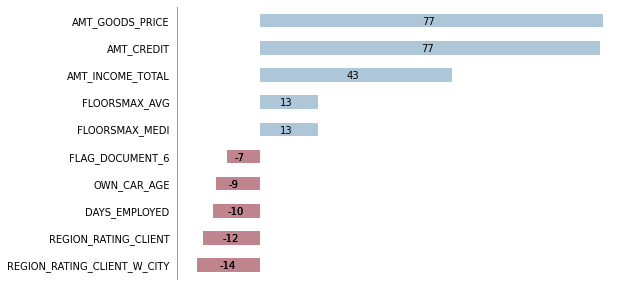

In [275]:
vi(corr ,'AMT_ANNUITY',5)